<div align="center">
 <h1> Marketing Bancário &nbsp; 💰💲</h1>
 </div>


  

###  Variáveis que vamos trabalhar



- <p><strong>Age</strong>: Idade do cliente.</p>

- <p><strong>Job</strong>: Tipo de trabalho do cliente.</p>

- <p><strong>Marital</strong>: Estado civil do cliente.</p>

- <p><strong>Education</strong>: Nível de educação do cliente.</p>

- <p><strong>Default</strong>: Indicador se o cliente tem crédito em inadimplente.</p>

- <p><strong>Balance</strong>: Saldo médio anual do cliente em euros.</p>

- <p><strong>Housing</strong>: Indicador se o cliente tem empréstimo habitação.</p>

- <p><strong>Loan</strong>: Indicador se o cliente tem empréstimo pessoal.</p>

- <p><strong>Day</strong>: Último dia de contato do mês.</p>

- <p><strong>Month</strong>: Último mês de contato do ano.</p>

- <p><strong>Duration</strong>: Duração do último contato, em segundos.</p>

- <p><strong>Campaign</strong>: Número de contatos realizados durante esta campanha e para este cliente, incluindo o último contato.</p>

- <p><strong>Pdays</strong>: Dias que o cliente foi contatado pela última vez em uma campanha anterior -1 não foi contatado anteriormente.</p>

- <p><strong>Previous</strong>: Número de contatos realizados antes desta campanha e para este cliente.</p>

- <p><strong>Poutcome</strong>: Resultado da campanha de marketing anterior.</p>

### Variável Alvo
- <strong>Depositou(y)</strong>: O cliente subscreveu a um depósito a prazo?

### Fonte do Dataframe
https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task 

  <div align="center">
 <h1> Bibliotecas Utilizadas 📖</h1>
 </div>

In [1184]:
# Tratamento de Dados
import pandas as pd
import numpy as np

# Para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report



# Desativar todos os avisos
import warnings
warnings.filterwarnings("ignore")


- Importando o DataFrame

In [1185]:
# Ler o arquivo e colunas  que serão usadas
df = pd.read_csv("bank_data.csv", usecols=["age", "job", "marital", "education", "default", "balance", "housing", "loan", "day", "month",
                                           "duration", "campaign", "pdays", "previous", "poutcome", "y"])

# Visualizando cinco amostras aleatórias do Dataframe
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
2119,31,unemployed,married,tertiary,no,591,no,no,21,nov,161,2,-1,0,unknown,no
1656,32,management,married,tertiary,no,71,yes,no,21,jul,221,8,-1,0,unknown,no
2776,37,management,married,primary,no,22856,no,no,2,jul,154,1,388,1,failure,no
2662,49,admin.,single,secondary,no,981,yes,no,21,nov,10,3,-1,0,unknown,no
1001,31,technician,single,tertiary,no,438,yes,no,12,aug,130,2,-1,0,unknown,no


<div align="center">
 <h1> Manipulação e Visualização dos Dados 🔎&nbsp; </h1>
 </div>

- Para tornar a compreensão mais fácil, vamos renomear a variável alvo, já que desempenha um papel crucial em nosso modelo !


In [1186]:
#Renomeando uma coluna do Dataframe
df.rename(columns={'y': "depositou"}, inplace=True)

#Checagem de números vázios. 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
depositou    0
dtype: int64

In [1187]:
#Verificando os tipos de dados das colunas, o tamanho do arquivo e a quantidade de linhas e colunas do Dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  depositou  4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.3+ KB


- Com este describe, aparentemente temos algumas anomalias. O número mais alto em relação aos outros é o saldo (balance), com 71 mil euros. Mais tarde, vamos verificar outras anomalias.

- Falando ainda sobre o saldo, vemos que 25% dos clientes têm menos de £69,00.

- Logo, percebemos que 75% dos clientes têm abaixo de 49 anos, e a mediana é de 39 anos, muito próxima da mediana de 41 anos, mostrando que não lidamos com um publico tão alto de idosos ...

In [1188]:
#Descrição estatística, arredondada para melhor visualização 
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


- Temos somente dois com saldo maior que 30.000, isso explica o desvio padrão não estar mais alto ainda !

In [1189]:
#Números de clientes com saldo acima de £30.000 
(df["balance"]>30000).sum() 

2

- 366 clientes com conta negativada . 

In [1190]:
# Avaliando números de pessoas com saldo negativo 
(df["balance"]<0).sum()

366

- Temos bastante variáveis categoricas.

In [1191]:
#Valores distintos por coluna
df.nunique().sort_values()    

default         2
housing         2
loan            2
depositou       2
marital         3
education       4
poutcome        4
job            12
month          12
previous       24
day            31
campaign       32
age            67
pdays         292
duration      875
balance      2353
dtype: int64

- Plotando um histograma de todas as variáveis. Com esse histograma, consigo observar como  as variáveis númericas estão distribuídas e sua frequência.

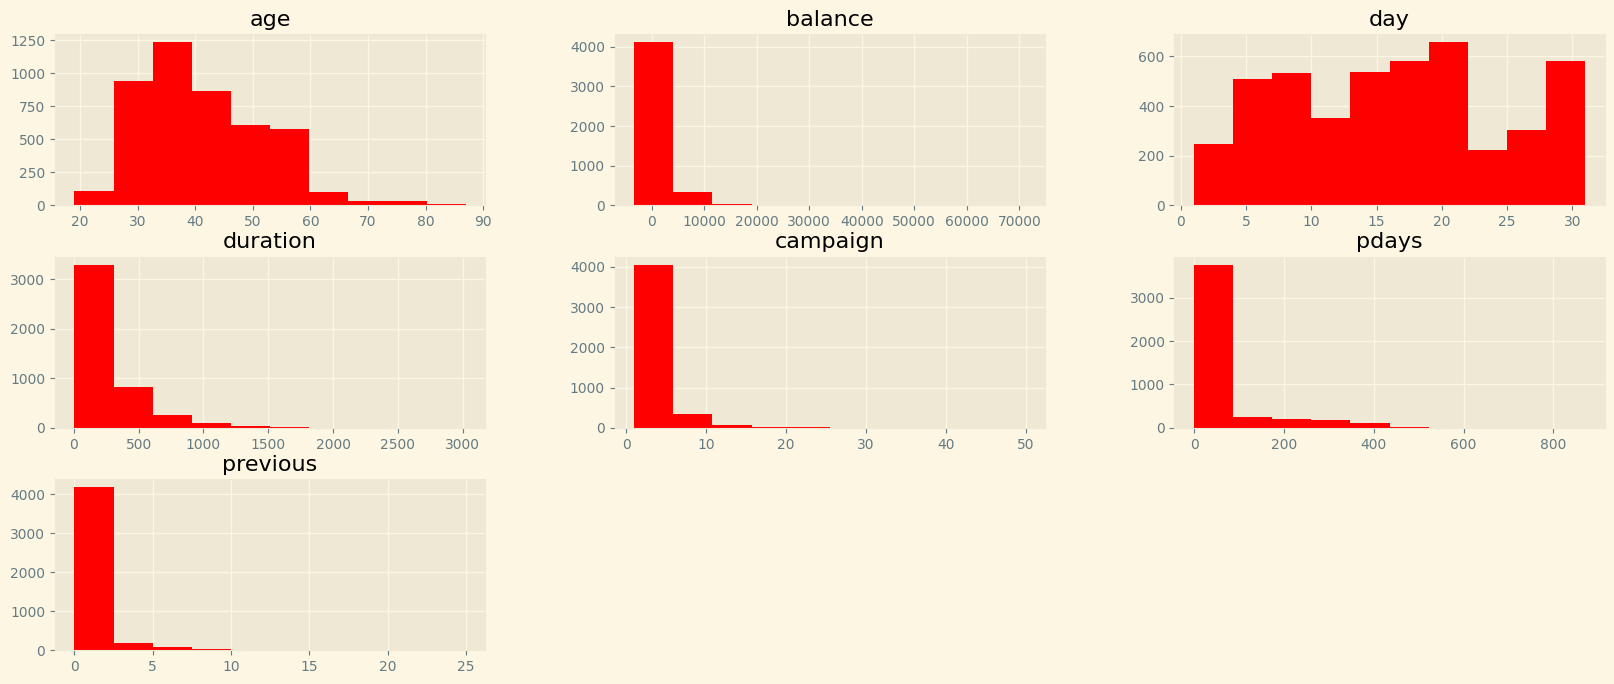

In [1192]:
# Plotando o histograma
df.hist(figsize=(20,8), color="r")
plt.show()

In [1193]:
#Visualizando 5 primeiras linhas
df.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,depositou
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,unknown,no


#### A campanha surtiu efeito em 11,5% dos clientes .

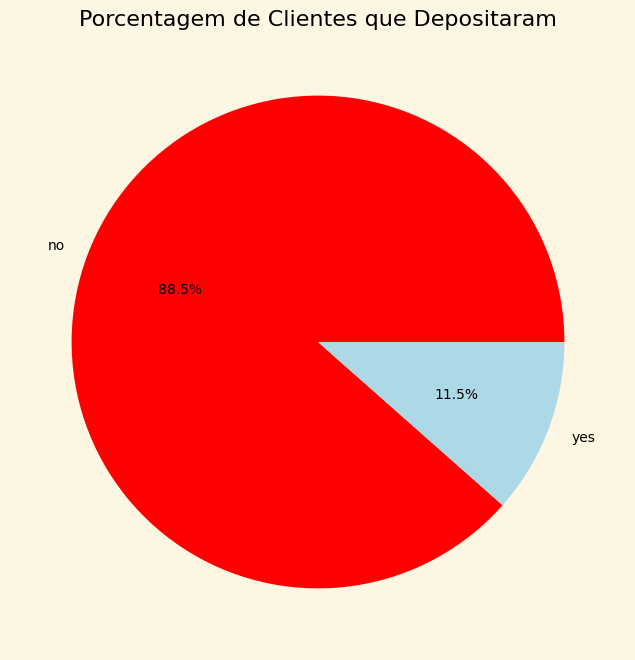

In [1194]:
# Calculando a contagem de "depositou_encoded"
depositou_counts = df["depositou"].value_counts()

# Cores para cada fatia
cores = ["red", "lightblue"]

# Criando o gráfico de pizza para "depositou"
plt.figure(figsize=(18,8))
plt.pie(x=depositou_counts, labels=depositou_counts.index, colors=cores, autopct="%1.1f%%")
plt.title("Porcentagem de Clientes que Depositaram")
plt.show()

In [1195]:
#Distinção da coluna trabalho
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

# Agora iremos observar algumas variáveis categoricas em relação a nossa variável alvo .

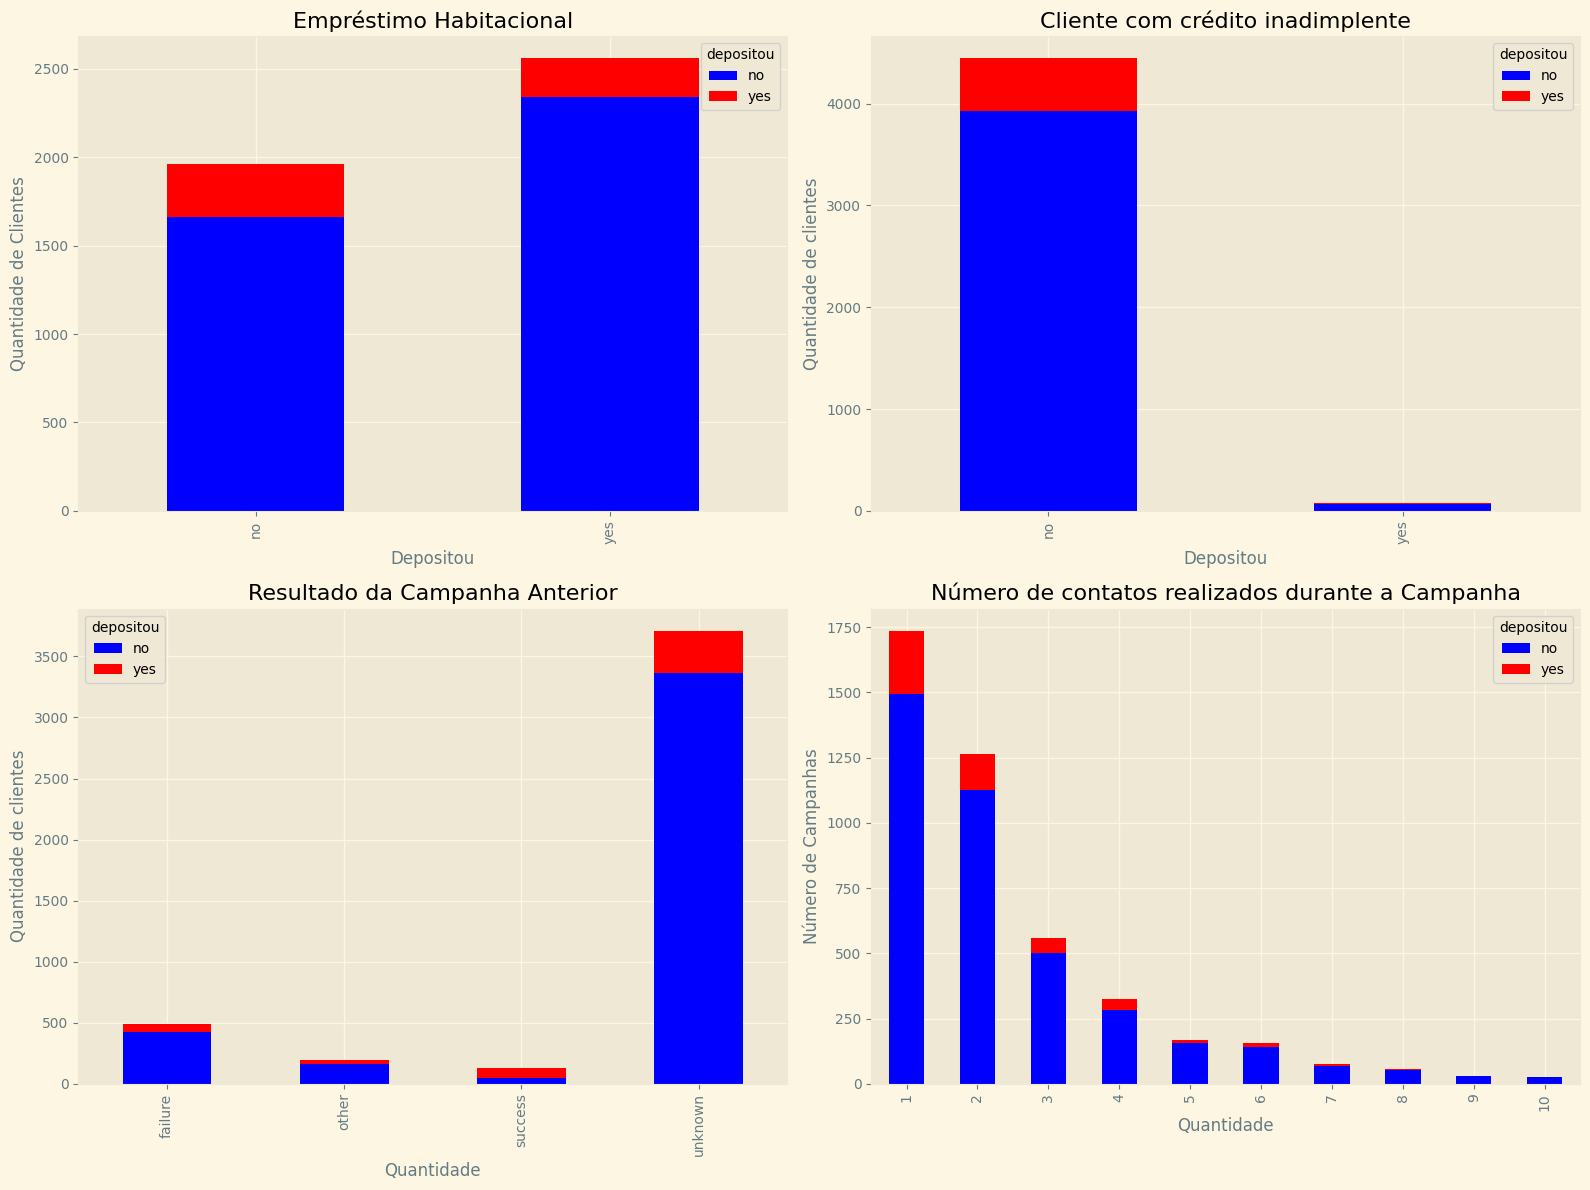

In [1196]:
plt.style.use("Solarize_Light2")
# Criando os subplots
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Comparação entre "housing" e "depositou"
df.groupby(["housing", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[0, 0], color=["b", "r"])
ax[0, 0].set_title("Empréstimo Habitacional")
ax[0, 0].set_xlabel("Depositou")
ax[0, 0].set_ylabel("Quantidade de Clientes")

# Gráfico 2: Comparação entre "default" e "depositou"
df.groupby(["default", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[0, 1], color=["b", "r"])
ax[0, 1].set_title("Cliente com crédito inadimplente")
ax[0, 1].set_xlabel("Depositou")
ax[0, 1].set_ylabel("Quantidade de clientes")

# Gráfico 3: Comparação entre "poutcome" e "depositou"
df.groupby(["poutcome", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[1, 0], color=["b", "r"])
ax[1, 0].set_title("Resultado da Campanha Anterior")
ax[1, 0].set_xlabel("Quantidade")
ax[1, 0].set_ylabel("Quantidade de clientes")

# Filtrando dados para campanhas menores que 10
df_tcampa = df[df["campaign"] < 11]

# Gráfico 4: Comparação entre "campaign" e "depositou"
df_tcampa.groupby(["campaign", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[1, 1], color=["b", "r"])
ax[1, 1].set_title("Número de contatos realizados durante a Campanha")
ax[1, 1].set_xlabel("Quantidade")
ax[1, 1].set_ylabel("Número de Campanhas")

# Ajustando o layout
plt.tight_layout()
# Exibindo os gráficos
plt.show()


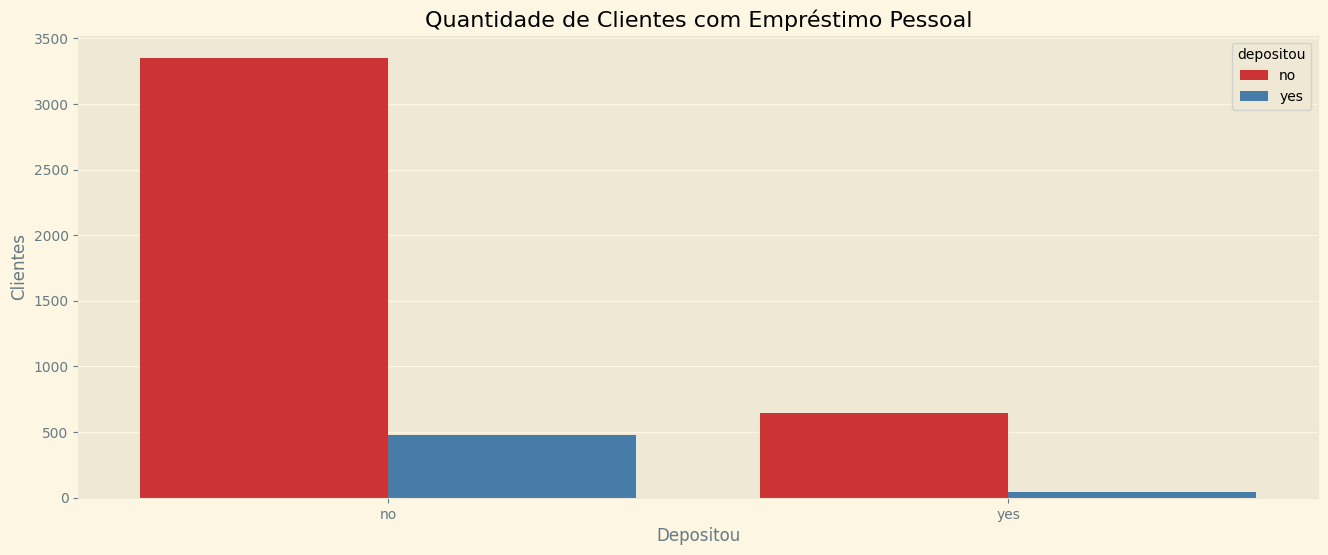

In [1197]:

# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(16, 6))

# Plotagem do gráfico de barras
sns.barplot(x="loan",                                             
            y="count",                                            
            hue="depositou",                                       
            data=df.groupby(["loan", "depositou"]).size().reset_index(name="count"),  # DataFrame de origem dos dados
            ax=ax,                                                  
            palette="Set1")                                          

# Adiciona rótulos e título ao gráfico
ax.set_xlabel("Depositou")                                          
ax.set_ylabel("Clientes")                                           
ax.set_title("Quantidade de Clientes com Empréstimo Pessoal")        

# Exibe o gráfico
plt.show()



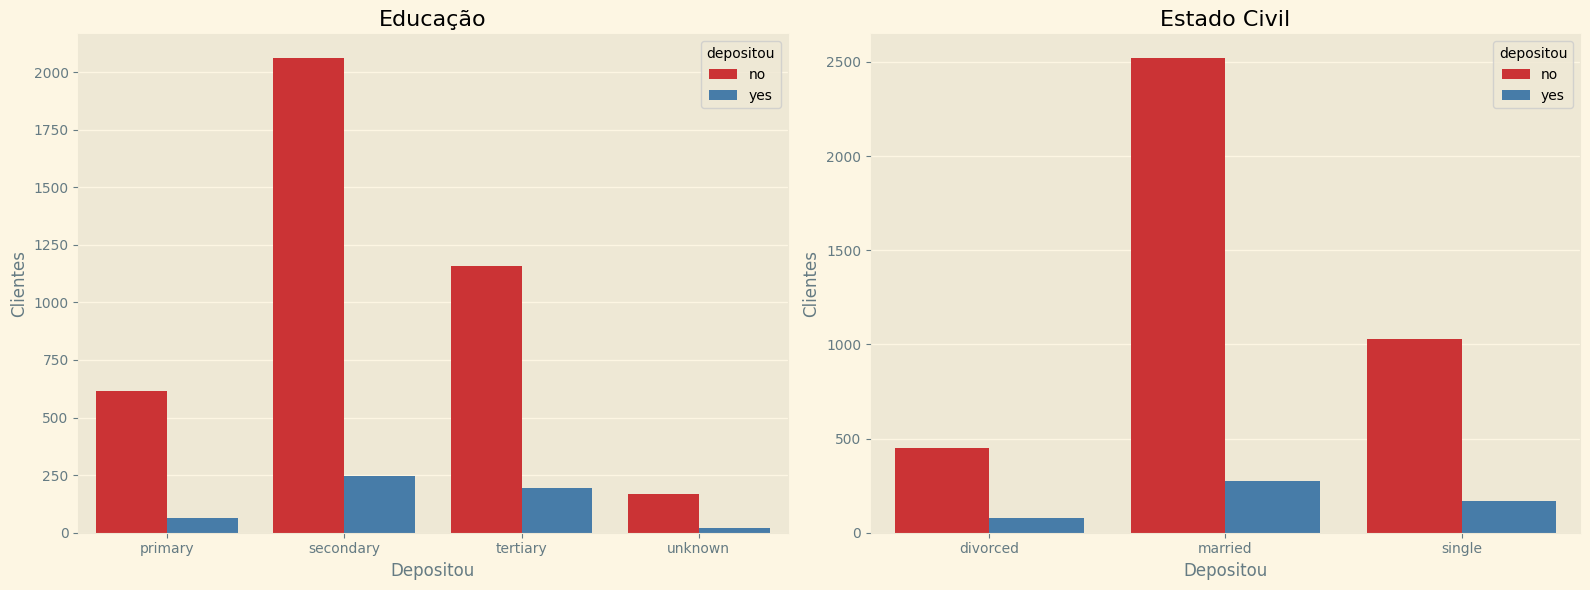

In [1198]:
# Define o tamanho da figura e o número de subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plotagem do primeiro gráfico de barras
sns.barplot(x="education", y="count", hue="depositou", data=df.groupby(["education", "depositou"]).size().reset_index(name="count"), ax=ax[0], palette="Set1")

# Adiciona rótulos e título ao primeiro gráfico
ax[0].set_xlabel("Depositou")  # Rótulo do eixo x
ax[0].set_ylabel("Clientes")   # Rótulo do eixo y
ax[0].set_title("Educação")    # Título do gráfico

# Plotagem do segundo gráfico de barras
sns.barplot(x="marital", y="count", hue="depositou", data=df.groupby(["marital", "depositou"]).size().reset_index(name="count"), ax=ax[1], palette="Set1")

# Adiciona rótulos e título ao segundo gráfico
ax[1].set_xlabel("Depositou")  # Rótulo do eixo x
ax[1].set_ylabel("Clientes")   # Rótulo do eixo y
ax[1].set_title("Estado Civil") # Título do gráfico

# Ajusta a disposição dos subplots para evitar sobreposição
plt.tight_layout()

# Exibe os gráficos
plt.show()


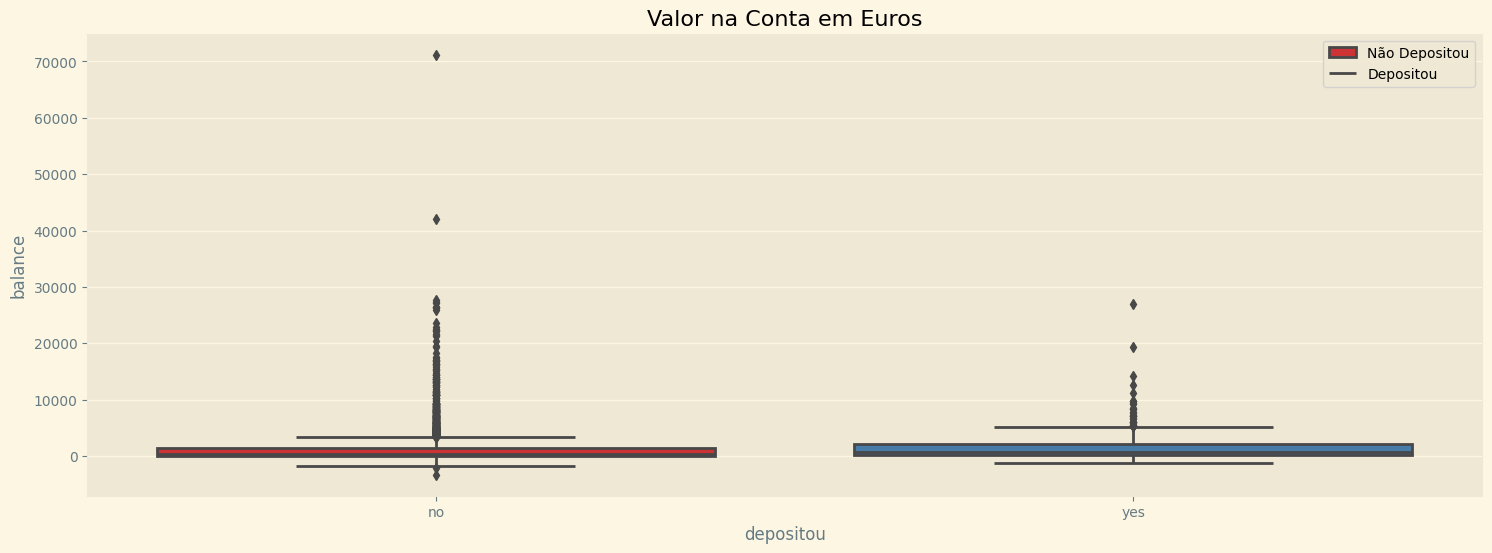

In [1199]:
#Tamanho do gráfico
fig = plt.figure(figsize=(18,6))
sns.boxplot(x="depositou", y="balance", data=df, palette="Set1")

# Adicionar título
plt.title("Valor na Conta em Euros")

# Adicionar legenda
plt.legend(labels=["Não Depositou", "Depositou"])

# Mostrar gráfico
plt.show()

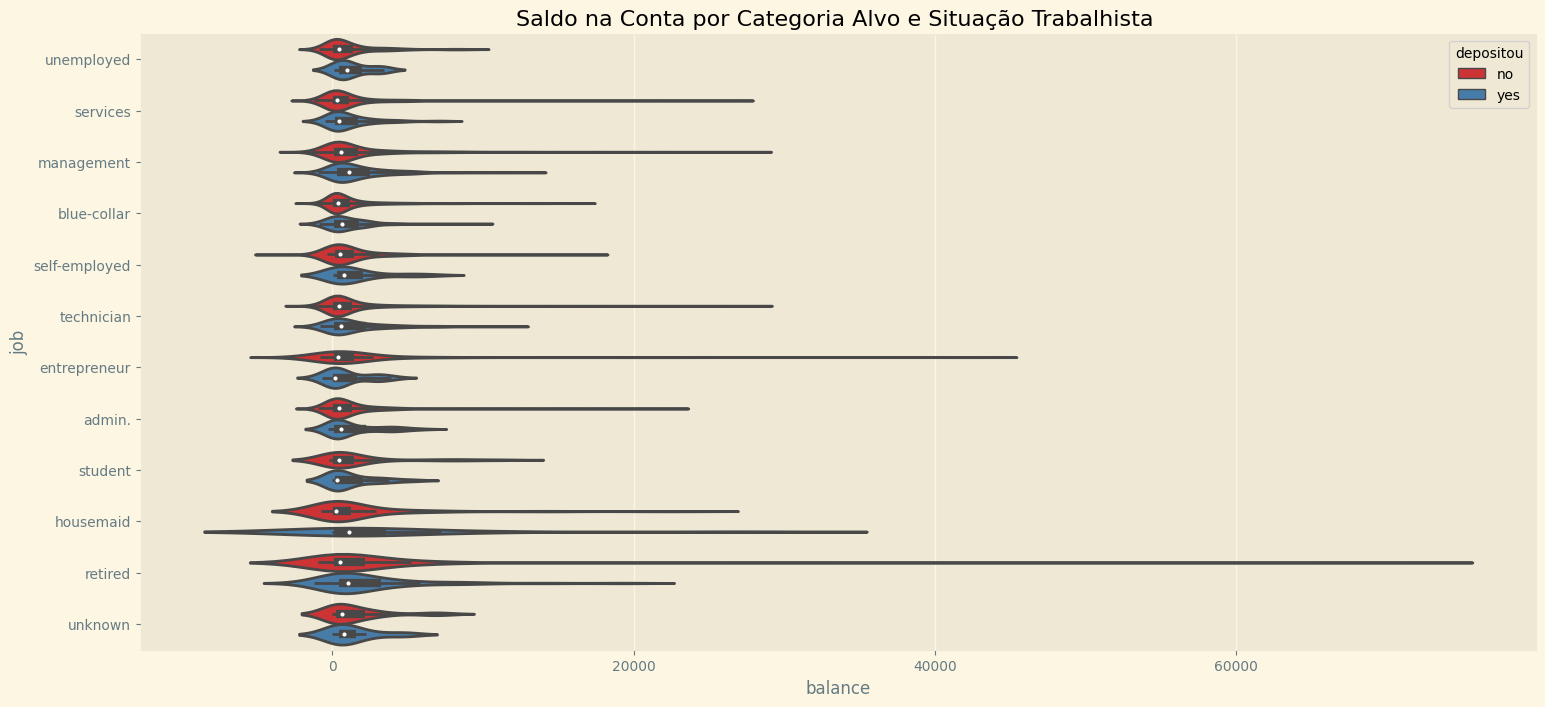

In [1200]:
# Define o tamanho da figura do gráfico
fig = plt.figure(figsize=(18,8))

# Cria um gráfico de violino
sns.violinplot(x="balance",             # Variável no eixo x
               y="job",                 # Variável no eixo y
               hue="depositou",        # Variável para dividir as violas
               palette="Set1",         # Paleta de cores
               data=df);                # DataFrame de origem dos dados

# Define o título do gráfico
plt.title("Saldo na Conta por Categoria Alvo e Situação Trabalhista ", fontsize=16)

# Exibe o gráfico
plt.show()


- O gráfico de violino mostra a distribuição completa dos dados, incluindo sua forma, dispersão e assimetria. Isso é útil para entender a natureza dos dados e podemos identificar padrões.

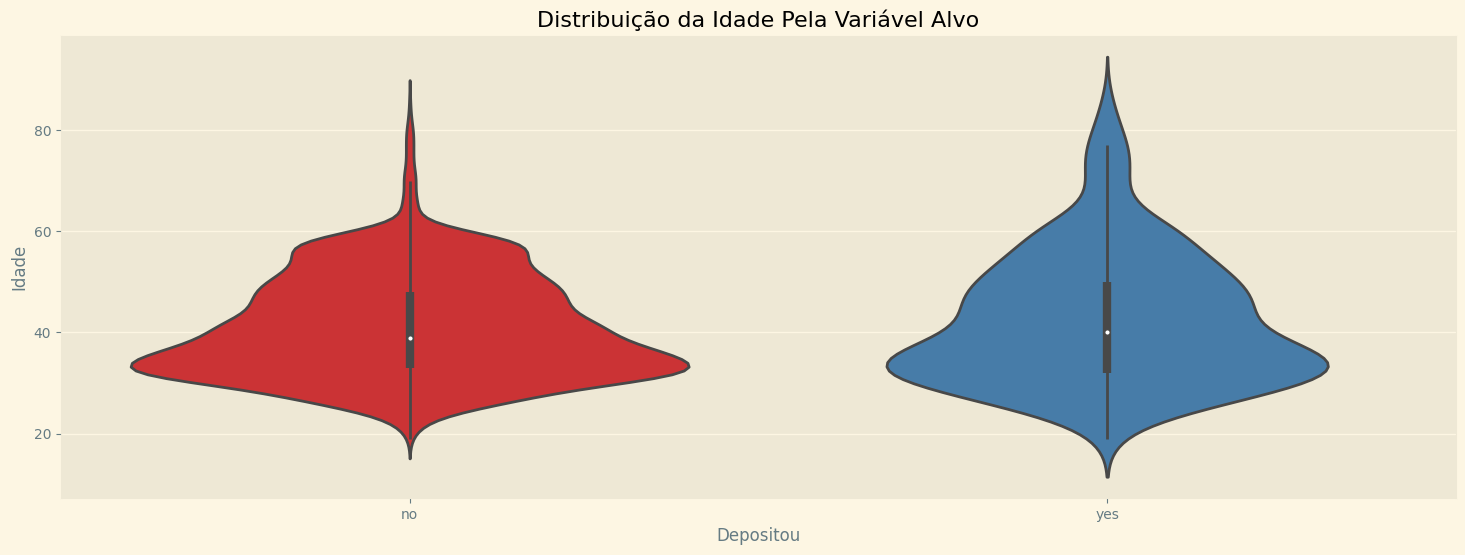

In [1201]:

#Tamanho do gráfico
plt.figure(figsize=(18, 6))

sns.violinplot(x="depositou", y="age",palette="Set1", data=df)
#Título e labels
plt.title("Distribuição da Idade Pela Variável Alvo")
plt.xlabel("Depositou")
plt.ylabel("Idade")
#Mostrar o grafico
plt.show()

### Verificando a distribuição de duração pela nossa variável .
- Pela distribuição indica que foi o parâmetro que mais se justificou pela campanha de market foi o tempo de duração do último contato .

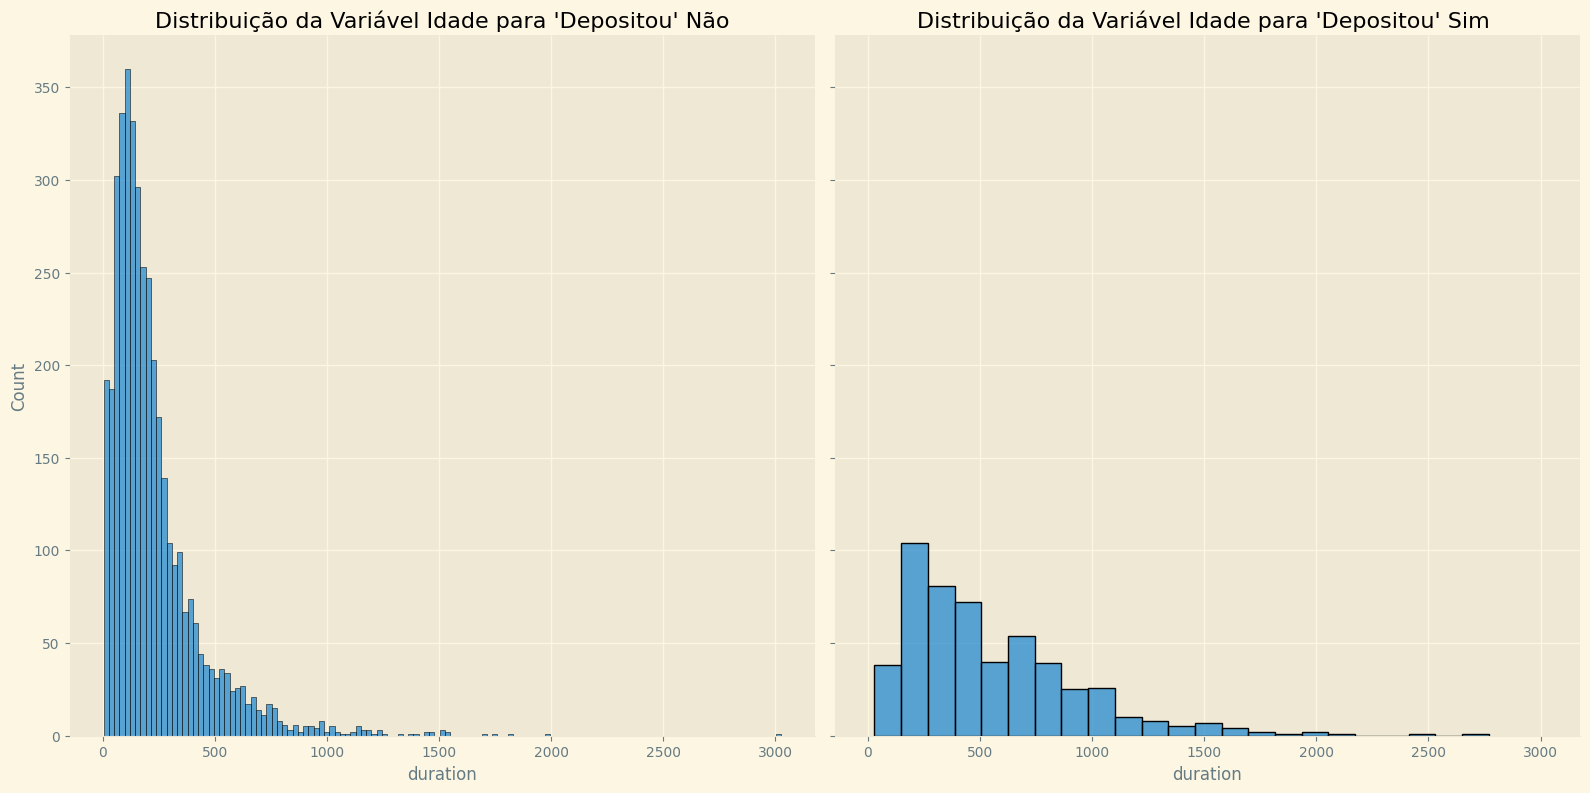

In [1202]:
# Criar um FacetGrid
his = sns.FacetGrid(df, col="depositou", height=8)

# Mapear o histograma para a coluna "duration"
his.map(sns.histplot, "duration")

# Adicionar título ao primeiro gráfico (para depositou=0)
his.axes[0, 0].set_title("Distribuição da Variável Idade para 'Depositou' Não" )

# Adicionar título ao segundo gráfico (para depositou=1)
his.axes[0, 1].set_title("Distribuição da Variável Idade para 'Depositou' Sim ")

# Mostrar o FacetGrid
plt.show()

In [1203]:
#Últimas 5 linhas
df.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,depositou
4516,33,services,married,secondary,no,-333,yes,no,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,3,apr,345,2,249,7,other,no


### Este gráfico mostra como as diferentes variáveis numéricas do conjunto de dados estão relacionadas entre sí, mas o maior objetivo é ver como estão se relacionando com minha variável alvo. As cores indicam o tipo e a força dessa relação de acordo com a legenda de cores, quanto mais proximo do um maior a relação entre elas.
- Realmente no mostrou que o elemento que mais se carácteriza pela efetividade da campanha foi a duração do telefonema .


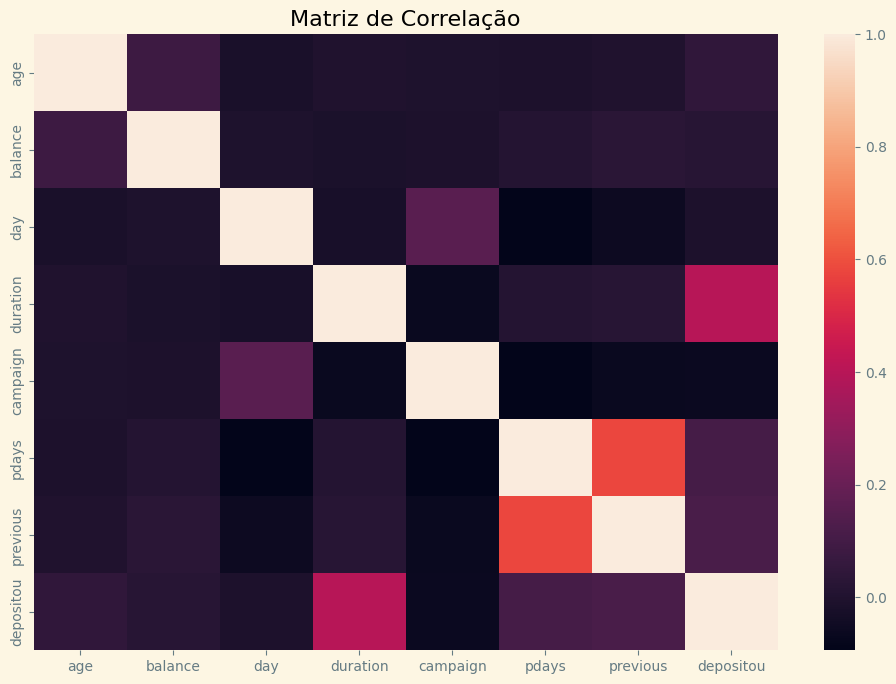

In [1204]:
# Importando bibliotecas necessária para transformar nossa variável
from sklearn.preprocessing import  LabelEncoder

# Criando uma figura para o gráfico com tamanho específico
fig = plt.figure(figsize=(12,8))

# Transformando a variável alvo 'depositou' usando LabelEncoder para torná-la numérica
df["depositou"] = LabelEncoder().fit_transform(df["depositou"])

# Selecionando apenas as colunas numéricas do DataFrame
df_numerico = df.select_dtypes(exclude="object")

# Calculando a matriz de correlação entre as variáveis numéricas
corr_numeric = df_numerico.corr()

# Plotando um mapa de calor da matriz de correlação
sns.heatmap(corr_numeric, cbar=True)
plt.title("Matriz de Correlação", fontsize=16)
plt.show()


In [1205]:
df_numerico.head()

,age,balance,day,duration,campaign,pdays,previous,depositou
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0


- Avaliando nossas características categóricas .

In [1206]:
#Somente variáveis categoricas
categoricas=df.select_dtypes(include="object")
categoricas.tail()

,job,marital,education,default,housing,loan,month,poutcome
4516,services,married,secondary,no,yes,no,jul,unknown
4517,self-employed,married,tertiary,yes,yes,yes,may,unknown
4518,technician,married,secondary,no,no,no,aug,unknown
4519,blue-collar,married,secondary,no,no,no,feb,other
4520,entrepreneur,single,tertiary,no,yes,yes,apr,other


- Preparando os dados para nosso modelo de Machine Learning

In [1207]:
#Codificar nossas variáveis nominais.
from category_encoders import OrdinalEncoder

#colunas que vou codificar para númericas
ord_enc =OrdinalEncoder(cols=['job', 'default', 'housing', 'loan', 'month', 'poutcome', 'marital','education'])

In [1208]:
#Novo Dataframe com indicadores codificados
novo_df=ord_enc.fit_transform(df)
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int32
 2   marital    4521 non-null   int32
 3   education  4521 non-null   int32
 4   default    4521 non-null   int32
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int32
 7   loan       4521 non-null   int32
 8   day        4521 non-null   int64
 9   month      4521 non-null   int32
 10  duration   4521 non-null   int64
 11  campaign   4521 non-null   int64
 12  pdays      4521 non-null   int64
 13  previous   4521 non-null   int64
 14  poutcome   4521 non-null   int32
 15  depositou  4521 non-null   int32
dtypes: int32(9), int64(7)
memory usage: 406.3 KB


In [1209]:
novo_df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,depositou
0,30,1,1,1,1,1787,1,1,19,1,79,1,-1,0,1,0
1,33,2,1,2,1,4789,2,2,11,2,220,1,339,4,2,0
2,35,3,2,3,1,1350,2,1,16,3,185,1,330,1,2,0
3,30,3,1,3,1,1476,2,2,3,4,199,4,-1,0,1,0
4,59,4,1,2,1,0,2,1,5,2,226,1,-1,0,1,0


In [1210]:
#Separando a target do nosso dataframe, para treino e teste
y = novo_df['depositou']  
X = novo_df.drop('depositou', axis=1)
#Fracionando os dados para teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)

In [1211]:
#importando a biblioteca da nossa arvore
from sklearn import tree

#Criando uma instância do classificador de árvore de decisão .
clf = tree.DecisionTreeClassifier()

#Treinando o modelo com os dados de treinamento (X_train e y_train).
clf=clf.fit(X_train, y_train)

In [1212]:
#Calculando a precisão do modelo nos dados de treinamento.
clf.score(X_train, y_train)

1.0

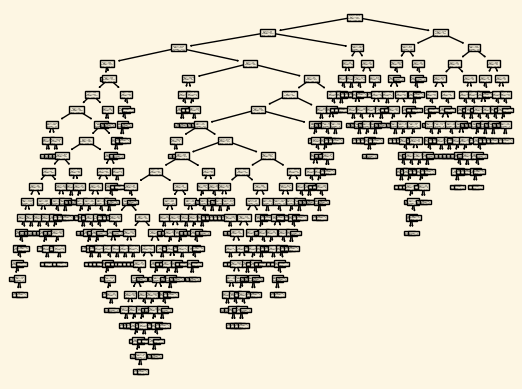

In [1213]:
# Criando uma nova figura e eixos para plotagem
fig, ax=plt.subplots()
# Plota a árvore de decisão treinada
tree.plot_tree(clf)
plt.show()

In [1214]:
y_pred=clf.predict(X_test)

# Importando a função confusion_matrix
from sklearn.metrics import confusion_matrix

# Calculando a matriz de confusão entre os valores reais e as previsões
confusion_matrix(y_test,y_pred)

array([[1210,   96],
       [ 101,   85]], dtype=int64)

<div align="center">
 <h1> Avaliação do Modelo </h1>
 </div>

- Fiz alguns teste e o modelo se saiu melhor usando o Índice de Gini em relação a entropia .

In [1215]:
clf2 = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

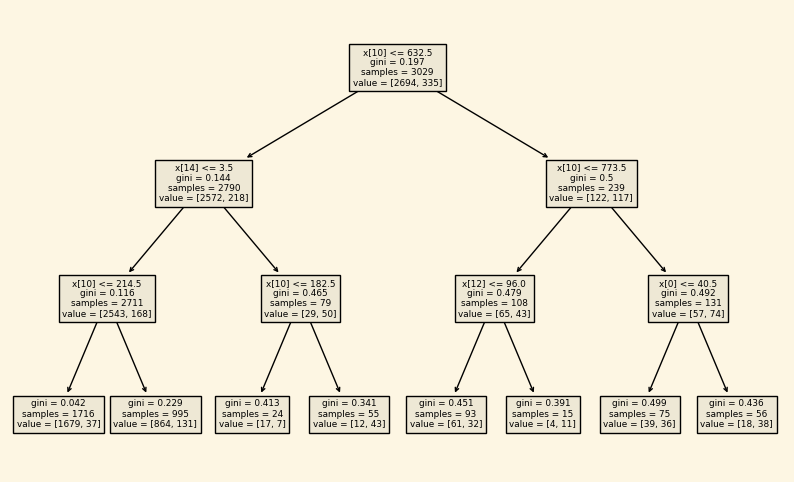

In [1216]:
#Modelo da arvore
plt.figure(figsize=(10,6))
tree.plot_tree(clf2)
plt.show()

In [1217]:
#Matrix da confusão
y_pred2=clf2.predict(X_test)
confusion_matrix(y_test,y_pred2)

array([[1278,   28],
       [ 133,   53]], dtype=int64)

In [1220]:
# Calcular a precisão média do modelo
accuracy = accuracy_score(y_test, y_pred2)

# Exibir a precisão média
print("Precisão média do modelo:", accuracy)

# Exibir o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred2))


Precisão média do modelo: 0.8920911528150134
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1306
           1       0.65      0.28      0.40       186

    accuracy                           0.89      1492
   macro avg       0.78      0.63      0.67      1492
weighted avg       0.87      0.89      0.87      1492

